# **1. Preparing Steps**


## **1.1 Install libraries**


In [21]:
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install seaborn
!pip install scikit-learn
!pip install graphviz
!pip install plotly
!pip install nbformat
!pip install joblib
!pip install ucimlrepo

In [6]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.utils import shuffle
import plotly.express as px
import plotly.graph_objects as go
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

## **1.2 Helper Functions**


In [74]:
def load_data():
    """
    Load and preprocess the Palmer Penguins dataset.

    This function reads the penguins.csv file, cleans and encodes the dataset,
    and returns the shuffled features, labels, and feature names for classification.

    Returns:
        tuple:
            - features (pandas.DataFrame): Processed feature data for model training.
            - labels (pandas.Series): Encoded target labels representing penguin species.
            - feature_names (list): Names of the features used.
            - label_encoder (LabelEncoder): Encoder for decoding predicted species.
    """
    # Load the dataset
    df = pd.read_csv("dataset/penguins.csv")

    # Drop unneeded columns (you can adjust based on EDA)
    df = df.drop(columns=[
        "studyName", "Sample Number", "Region", "Stage", "Clutch Completion", "Date Egg", "Comments"
    ], errors="ignore")

    # Drop rows with missing values
    df = df.dropna()

    # Encode the target variable (Species) to numeric values
    label_encoder = LabelEncoder()
    df["target"] = label_encoder.fit_transform(df["Species"])  # 0 = Adelie, 1 = Chinstrap, 2 = Gentoo

    # One-Hot Encoding for 'Sex' column (creating separate columns for 'male' and 'female')
    df = pd.get_dummies(df, columns=["Sex"], drop_first=True)  # Drop first to avoid dummy variable trap

    # You can further modify how the values are encoded if necessary

    # Define the features (X) and labels (y)
    features = df.drop(columns=["Species", "target"])  # Exclude target and Species columns
    labels = df["target"]
    feature_names = features.columns.tolist()

    # Shuffle the data for randomness
    features_shuffled, labels_shuffled = shuffle(features, labels, random_state=42)

    return features_shuffled, labels_shuffled, feature_names, label_encoder

In [46]:
def split_data(features, labels, train_size, test_size):
    """
    Split the Heart Disease dataset into training and testing sets.

    This function splits the input features and labels (from heart.csv)
    into training and testing sets based on the specified proportions.
    The split is stratified to preserve class distribution.

    Args:
        features (pandas.DataFrame): The feature data.
        labels (pandas.Series): The target labels.
        train_size (float): Proportion of data for training.
        test_size (float): Proportion of data for testing.

    Returns:
        tuple:
            - feature_train (pandas.DataFrame): Training features.
            - feature_test (pandas.DataFrame): Testing features.
            - label_train (pandas.Series): Training labels.
            - label_test (pandas.Series): Testing labels.
    """
    feature_train, feature_test, label_train, label_test = train_test_split(
        features,
        labels,
        train_size=train_size,
        test_size=test_size,
        stratify=labels,
        random_state=42,
        shuffle=True
    )

    return feature_train, feature_test, label_train, label_test

In [47]:
def create_datasets(features, labels, split_ratios):
    """
    Create multiple train-test splits from the Heart Disease dataset.

    This function uses different train/test ratios to create
    multiple datasets, stratified to preserve label distribution.

    Args:
        features (pandas.DataFrame): Feature data from heart.csv.
        labels (pandas.Series): Label data (0 or 1).
        split_ratios (list of tuples): Each tuple contains (train_size, test_size), e.g., (0.8, 0.2).

    Returns:
        list of dicts: Each dict contains:
            - 'train_size': float, training size used
            - 'test_size': float, testing size used
            - 'X_train', 'X_test': features
            - 'y_train', 'y_test': labels
    """
    datasets = []

    for train_size, test_size in split_ratios:
        X_train, X_test, y_train, y_test = split_data(
            features, labels, train_size, test_size
        )
        datasets.append({
            "train_size": train_size,
            "test_size": test_size,
            "X_train": X_train,
            "X_test": X_test,
            "y_train": y_train,
            "y_test": y_test,
        })

    return datasets

# **2. Preparing the data sets**


## **2.1 Create training and test sets of different proportions**


In [ ]:
features_shuffle, labels_shuffle, features_name, label_encoder = load_data()

AttributeError: 'list' object has no attribute 'drop'

In [76]:
features_shuffle.head()

,Island,Individual ID,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo),Sex_FEMALE,Sex_MALE
249,Biscoe,N47A2,50.0,15.3,220.0,5550.0,8.30515,-25.19017,False,True
123,Torgersen,N67A2,41.4,18.5,202.0,3875.0,9.59462,-25.42621,False,True
264,Biscoe,N8A1,50.5,15.9,222.0,5550.0,8.46894,-26.60436,False,True
18,Torgersen,N10A1,34.4,18.4,184.0,3325.0,8.47827,-25.23319,True,False
106,Biscoe,N53A1,38.6,17.2,199.0,3750.0,8.77322,-26.48973,True,False


In [77]:
features_shuffle.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,325.000000,325.000000,325.000000,325.000000,325.000000,325.000000
mean,44.054769,17.123077,201.264615,4216.000000,8.737794,-25.690217
std,5.472226,1.965942,13.964598,808.859222,0.552581,0.790098
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.500000,15.600000,190.000000,3550.000000,8.302310,-26.326010
50%,44.900000,17.300000,197.000000,4050.000000,8.658030,-25.852030
75%,48.700000,18.600000,213.000000,4800.000000,9.180210,-25.060200
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.890170


In [78]:
labels_shuffle.head()

249    2
123    0
264    2
18     0
106    0
Name: target, dtype: int64

In [79]:
labels_shuffle.describe()

count    325.000000
mean       0.938462
std        0.890223
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: target, dtype: float64

# Xóa bỏ các cột không cần thiết

In [98]:
features_shuffle = features_shuffle.drop(columns=["Individual ID", "studyName", "Sample Number", "Culmen Depth (mm)", "Delta 15 N (o/oo)", "Delta 13 C (o/oo)", "Island"], errors="ignore")
features_name = [col for col in features_shuffle.columns if col not in ["Species", "target"]]

In [81]:
features_shuffle.head()

,Culmen Length (mm),Flipper Length (mm),Body Mass (g),Sex_FEMALE,Sex_MALE
249,50.0,220.0,5550.0,False,True
123,41.4,202.0,3875.0,False,True
264,50.5,222.0,5550.0,False,True
18,34.4,184.0,3325.0,True,False
106,38.6,199.0,3750.0,True,False


In [82]:
features_data = features_shuffle.values
labels_data = labels_shuffle.values

In [83]:
# Create datasets with different ratios
split_ratios = [(0.4, 0.6), (0.6, 0.4), (0.8, 0.2), (0.9, 0.1)]
datasets = create_datasets(features_data, labels_data, split_ratios)

## **2.2 Visualize the distribution of classes in all the data sets**


In [84]:
def plot_label_distributions(listDatasets, listProportions, original_labels, class_names=None):
    """
    Hiển thị biểu đồ phân phối nhãn trong tập gốc, tập train và tập test.

    Args:
        listDatasets (list of dict): Mỗi dict chứa X_train, X_test, y_train, y_test.
        listProportions (list of tuples): Danh sách tỷ lệ train/test (e.g., [(0.8, 0.2)]).
        original_labels (Series or ndarray): Nhãn ban đầu trước khi chia tập.
        class_names (list, optional): Tên lớp (e.g., ["Adelie", "Chinstrap", "Gentoo"] hoặc ["No Disease", "Has Disease"]).
                                      Nếu không có, dùng nhãn số mặc định.
    """

    # Chuyển labels thành array 1D nếu cần
    if hasattr(original_labels, "values"):
        original_labels = original_labels.values
    original_labels = np.array(original_labels).flatten()

    # Các lớp nhãn
    label_classes = sorted(np.unique(original_labels))

    # Tên hiển thị trên trục X
    if class_names is not None:
        tick_labels = [f"{name} ({label})" for label, name in zip(label_classes, class_names)]
    else:
        tick_labels = [f"Class {label}" for label in label_classes]

    # Đếm nhãn trong tập gốc
    original_counts = pd.Series(original_labels).value_counts().reindex(label_classes, fill_value=0).values

    for i, (train_ratio, test_ratio) in enumerate(listProportions):
        y_train = np.array(listDatasets[i]['y_train']).flatten()
        y_test = np.array(listDatasets[i]['y_test']).flatten()

        train_counts = pd.Series(y_train).value_counts().reindex(label_classes, fill_value=0).values
        test_counts = pd.Series(y_test).value_counts().reindex(label_classes, fill_value=0).values

        x = np.arange(len(label_classes))
        width = 0.25

        fig = go.Figure()

        fig.add_trace(go.Bar(
            x=x - width,
            y=original_counts,
            width=width,
            name="Original Set",
            text=label_classes,
            hoverinfo="x+y+text",
            marker_color=px.colors.qualitative.Plotly[0]
        ))

        fig.add_trace(go.Bar(
            x=x,
            y=train_counts,
            width=width,
            name="Training Set",
            text=label_classes,
            hoverinfo="x+y+text",
            marker_color=px.colors.qualitative.Plotly[1]
        ))

        fig.add_trace(go.Bar(
            x=x + width,
            y=test_counts,
            width=width,
            name="Testing Set",
            text=label_classes,
            hoverinfo="x+y+text",
            marker_color=px.colors.qualitative.Plotly[2]
        ))

        fig.update_layout(
            title=f"Label Distribution - Split ({int(train_ratio * 100)}% Train, {int(test_ratio * 100)}% Test)",
            xaxis=dict(title="Labels", tickvals=x, ticktext=tick_labels),
            yaxis=dict(title="Count"),
            barmode="group",
            legend_title_text="Dataset"
        )

        fig.show()

In [85]:
plot_label_distributions(datasets, split_ratios, labels_data, class_names=list(label_encoder.classes_))

# **3. Building the decision tree classifiers**


## **3.1 Training model decision tree classifiers with different split ratios**


In [86]:
import os
def train_and_save_decision_trees(datasets, split_ratios, save_dir="models", random_state=42):
    """
    Huấn luyện và lưu các mô hình Decision Tree ứng với các tỷ lệ train/test khác nhau.

    Args:
        datasets (list of dict): Mỗi dict chứa X_train, y_train tương ứng với tỷ lệ chia.
        split_ratios (list of tuples): Danh sách các tỷ lệ (train_size, test_size), ví dụ: [(0.8, 0.2), ...].
        save_dir (str): Thư mục nơi lưu các mô hình (.pkl).
        random_state (int): Seed đảm bảo tái lập mô hình.

    Returns:
        list: Danh sách các mô hình DecisionTreeClassifier đã được huấn luyện.
    """
    os.makedirs(save_dir, exist_ok=True)
    trained_models = []

    for i, (train_size, test_size) in enumerate(split_ratios):
        data = datasets[i]
        X_train = data['X_train']
        y_train = data['y_train']

        # Tạo và huấn luyện mô hình
        clf = DecisionTreeClassifier(
            criterion="entropy",
            splitter="best",
            random_state=random_state
        )
        clf.fit(X_train, y_train)
        trained_models.append(clf)

        # Tên file lưu
        model_filename = f"decision_tree_{int(train_size * 100)}_{int(test_size * 100)}.pkl"
        model_path = os.path.join(save_dir, model_filename)

        # Lưu mô hình
        joblib.dump(clf, model_path)
        print(f"✓ Model saved: {model_path}")

    return trained_models

In [89]:
list_models = train_and_save_decision_trees(
    datasets=datasets,
    split_ratios=split_ratios,
    save_dir="models_penguins"
)

✓ Model saved: models_penguins\decision_tree_40_60.pkl
✓ Model saved: models_penguins\decision_tree_60_40.pkl
✓ Model saved: models_penguins\decision_tree_80_20.pkl
✓ Model saved: models_penguins\decision_tree_90_10.pkl


## **3.2 Visualize decision trees with different split ratios**


In [93]:
def export_and_display_decision_trees(models, split_ratios, feature_names, class_labels, save_dir="output/split_ratios_graphviz"):
    """
    Xuất và hiển thị cây quyết định cho từng mô hình DecisionTreeClassifier đã huấn luyện,
    theo các tỷ lệ train/test. Mỗi cây được lưu dưới dạng hình ảnh PNG.

    Args:
        models (list): Danh sách các mô hình DecisionTreeClassifier đã huấn luyện.
        split_ratios (list of tuples): Danh sách các tỷ lệ train/test (e.g., [(0.8, 0.2)]).
        feature_names (list): Tên các đặc trưng của dataset.
        class_labels (list): Tên các lớp (species) sau khi mã hóa.
        save_dir (str): Thư mục để lưu các biểu đồ cây (PNG).
    """

    os.makedirs(save_dir, exist_ok=True)

    for model, (train_ratio, test_ratio) in zip(models, split_ratios):
        # Chuyển cây thành định dạng DOT
        dot = export_graphviz(
            model,
            feature_names=feature_names,  # Đặc trưng
            class_names=class_labels,    # Nhãn (Species)
            filled=True,
            rounded=True,
            special_characters=True
        )

        # Tạo đối tượng biểu đồ từ DOT
        tree_graph = graphviz.Source(dot)
        tree_graph.engine = "dot"

        # Đặt tên file và lưu
        filename = f"tree_{int(train_ratio*100)}_{int(test_ratio*100)}"
        filepath = os.path.join(save_dir, filename)

        # Xuất hình ảnh cây dưới dạng PNG
        tree_graph.render(filepath, format="png", cleanup=True)

        # Hiển thị cây quyết định trong notebook
        display(tree_graph)

        print(f"✓ Decision Tree saved for split {int(train_ratio*100)}:{int(test_ratio*100)} → {filepath}.png")

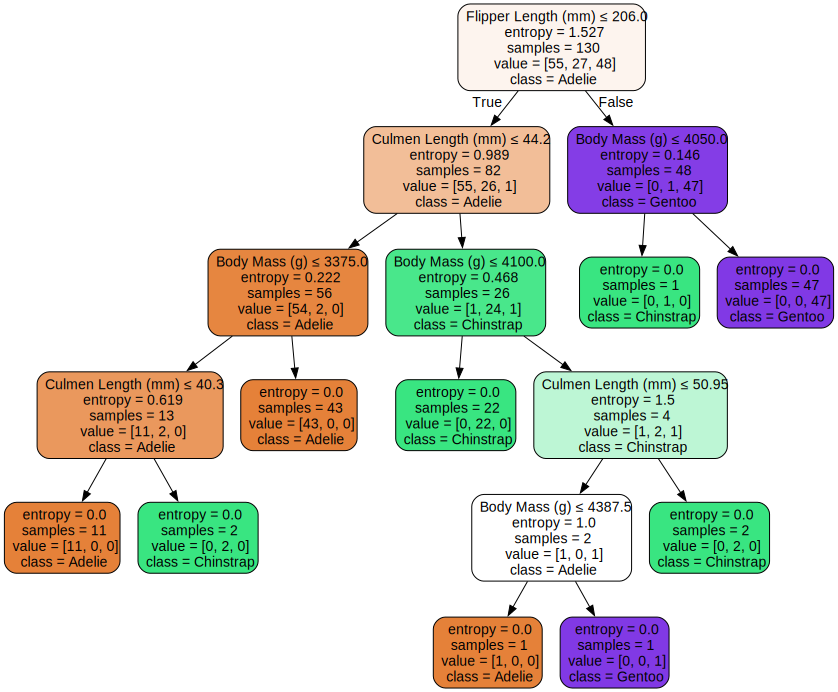

✓ Decision Tree saved for split 40:60 → output/split_ratios_graphviz\tree_40_60.png


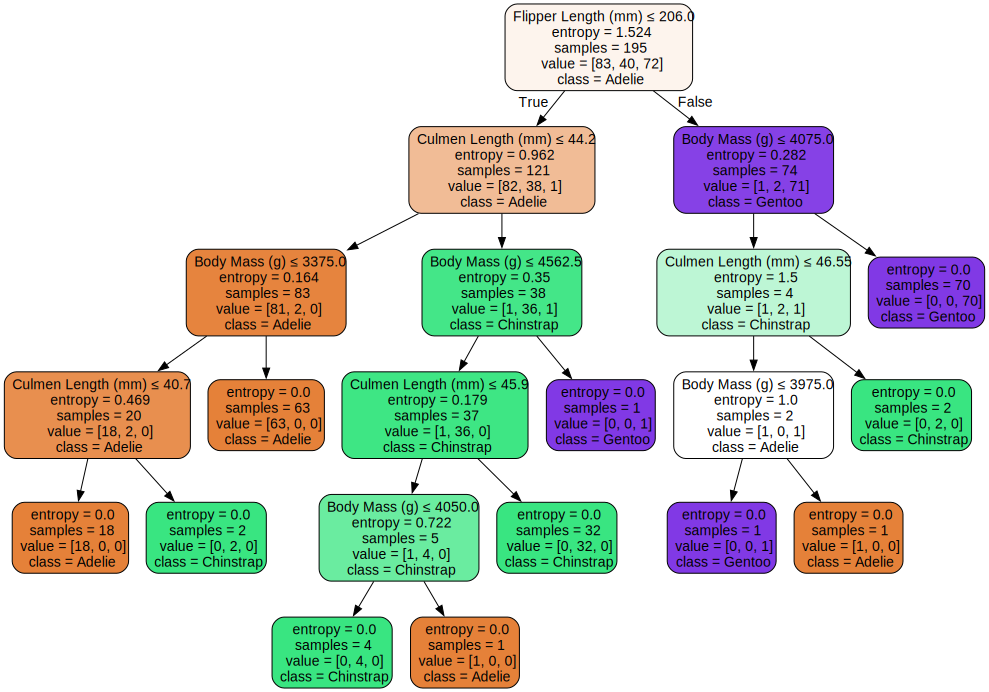

✓ Decision Tree saved for split 60:40 → output/split_ratios_graphviz\tree_60_40.png


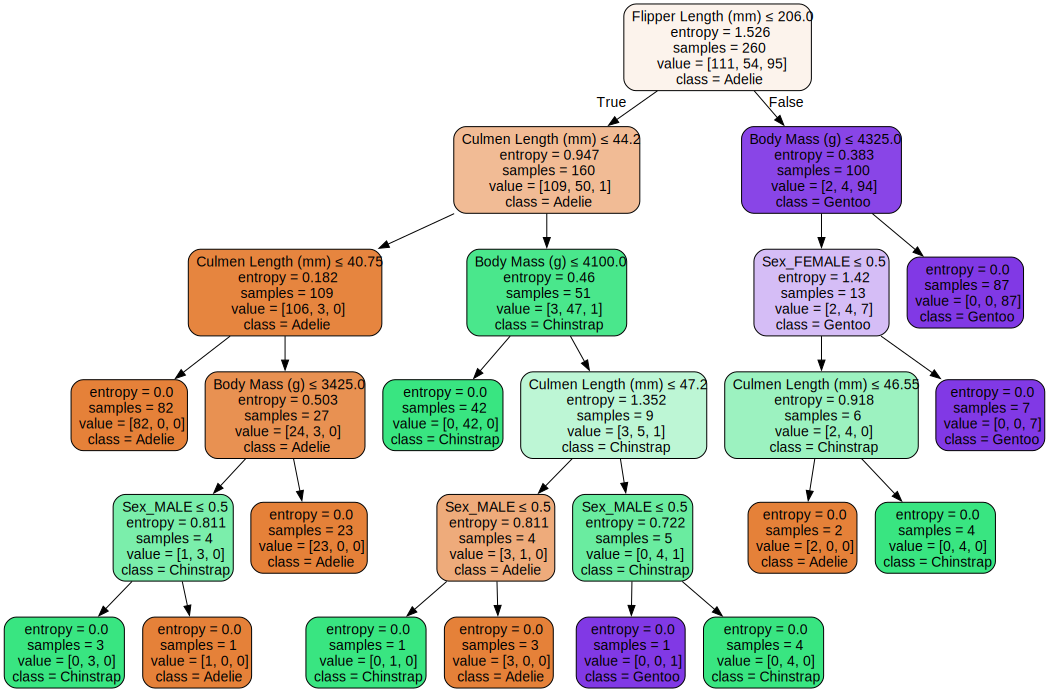

✓ Decision Tree saved for split 80:20 → output/split_ratios_graphviz\tree_80_20.png


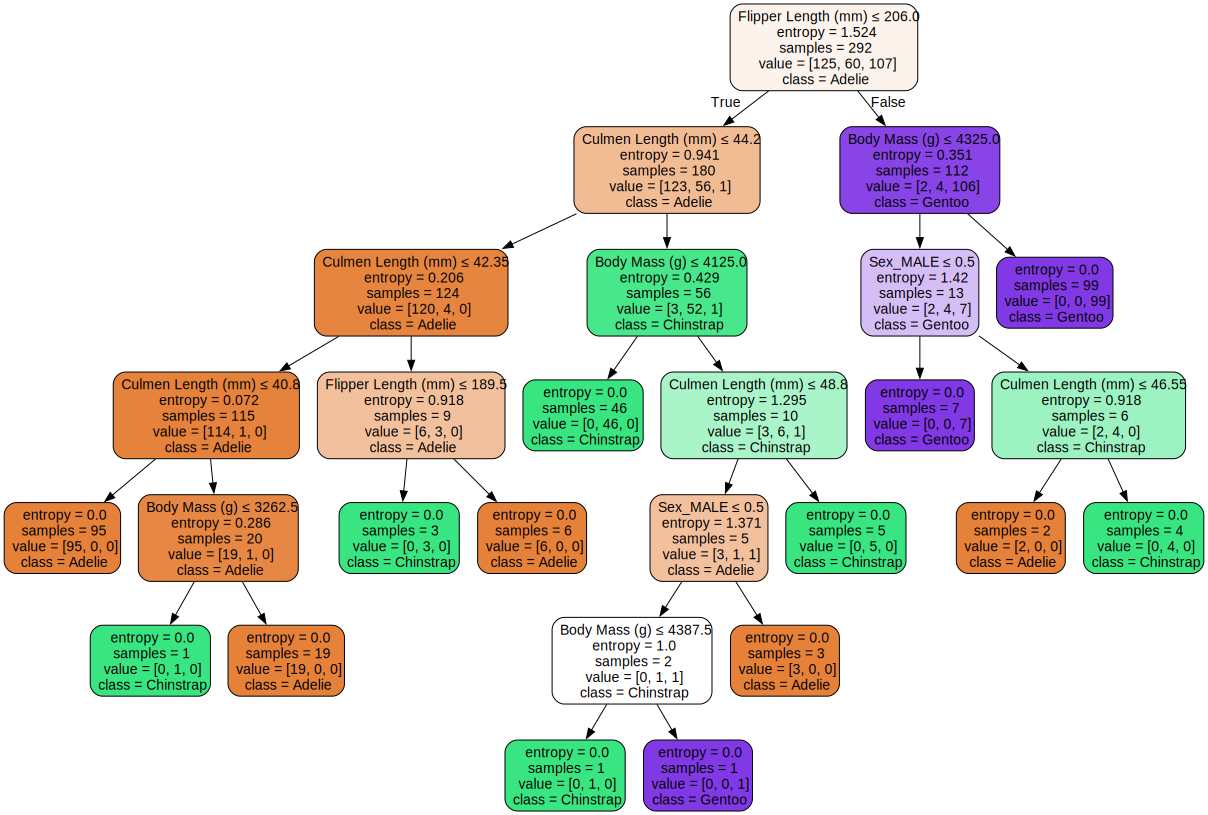

✓ Decision Tree saved for split 90:10 → output/split_ratios_graphviz\tree_90_10.png


In [99]:
class_name = ["Adelie", "Chinstrap", "Gentoo"]
export_and_display_decision_trees(list_models, split_ratios, features_name, class_name)

# **4. Evaluating the decision tree classifiers**

## **4.1 Visualize confusion matrix and classification report**


In [100]:
import os

def evaluate_and_visualize_models(models, datasets, split_ratios, save_dir="output/report/split_ratios_ver"):
    """
    Đánh giá danh sách mô hình và trực quan hóa classification report + confusion matrix.
    Lưu kết quả dưới dạng ảnh PNG, tránh lỗi khi mô hình chỉ dự đoán 1 class.

    Args:
        models (list): Các mô hình đã huấn luyện.
        datasets (list): Danh sách dict chứa X_test, y_test,...
        split_ratios (list): Danh sách các tỷ lệ chia train/test.
        save_dir (str): Thư mục lưu ảnh đánh giá.
    """
    os.makedirs(save_dir, exist_ok=True)

    for model, data, (train_ratio, test_ratio) in zip(models, datasets, split_ratios):
        X_test = data['X_test']
        y_test = data['y_test']
        y_pred = model.predict(X_test)

        # Tạo classification report dưới dạng text + dict
        report_text = classification_report(y_test, y_pred, digits=4, zero_division=1)
        report_dict = classification_report(y_test, y_pred, digits=4, zero_division=1, output_dict=True)

        matrix = confusion_matrix(y_test, y_pred)

        # ==== Vẽ hình ====
        fig = plt.figure(figsize=(15, 8))

        # --- Vẽ bảng classification report ---
        plt.subplot(1, 2, 1)

        # Lấy các lớp thực tế được dự đoán
        label_keys = [key for key in report_dict.keys() if key not in ['accuracy', 'macro avg', 'weighted avg']]
        if len(label_keys) < 1:
            print(f"⚠️ Report bị thiếu nhãn! Bỏ qua split {train_ratio}:{test_ratio}")
            continue

        class_labels = label_keys
        data = [[
            f"{report_dict[label]['precision']:.4f}",
            f"{report_dict[label]['recall']:.4f}",
            f"{report_dict[label]['f1-score']:.4f}",
            f"{int(report_dict[label]['support'])}"
        ] for label in class_labels]

        stat_labels = ["accuracy", "macro avg", "weighted avg"]
        stat_data = []

        # accuracy (special case)
        stat_data.append([" ", " ", f"{report_dict['accuracy']:.4f}", " "])

        for label in ["macro avg", "weighted avg"]:
            values = report_dict.get(label)
            if values:
                stat_data.append([
                    f"{values['precision']:.4f}",
                    f"{values['recall']:.4f}",
                    f"{values['f1-score']:.4f}",
                    f"{int(values['support'])}"
                ])

        tbl = plt.table(
            cellText=data,
            colLabels=["Precision", "Recall", "F1-score", "Support"],
            rowLabels=class_labels,
            loc='center',
            cellLoc='center',
            bbox=[0.2, 0.45, 0.6, 0.4]
        )
        tbl.auto_set_font_size(False)
        tbl.set_fontsize(10)

        stat_tbl = plt.table(
            cellText=stat_data,
            rowLabels=stat_labels,
            cellLoc='center',
            bbox=[0.3, 0.02, 0.5, 0.35]
        )
        stat_tbl.auto_set_font_size(False)
        stat_tbl.set_fontsize(10)

        for table in [tbl, stat_tbl]:
            for cell in table.get_celld().values():
                cell.set_edgecolor("white")
                cell.set_text_props(ha="center", va="center")
                cell.set_height(0.1)

        plt.axis("off")
        plt.title("Classification Report")

        # --- Vẽ heatmap Confusion Matrix ---
        plt.subplot(1, 2, 2)
        sns.heatmap(matrix,
                    annot=True,
                    fmt="d",
                    cmap="magma",
                    xticklabels=model.classes_,
                    yticklabels=model.classes_,
                    cbar=True,
                    linewidths=0)
        plt.xlabel("Predicted")
        plt.ylabel("True")
        plt.title("Confusion Matrix")

        plt.suptitle(f"Decision Tree - Split {int(train_ratio*100)}% / {int(test_ratio*100)}%", fontsize=16)
        plt.tight_layout(rect=[0, 0.03, 1, 0.95])

        # Lưu hình
        file_path = os.path.join(save_dir, f"report_model_{int(train_ratio*100)}_{int(test_ratio*100)}.png")
        plt.savefig(file_path)
        plt.show()

        print(f"✓ Evaluation saved: {file_path}")

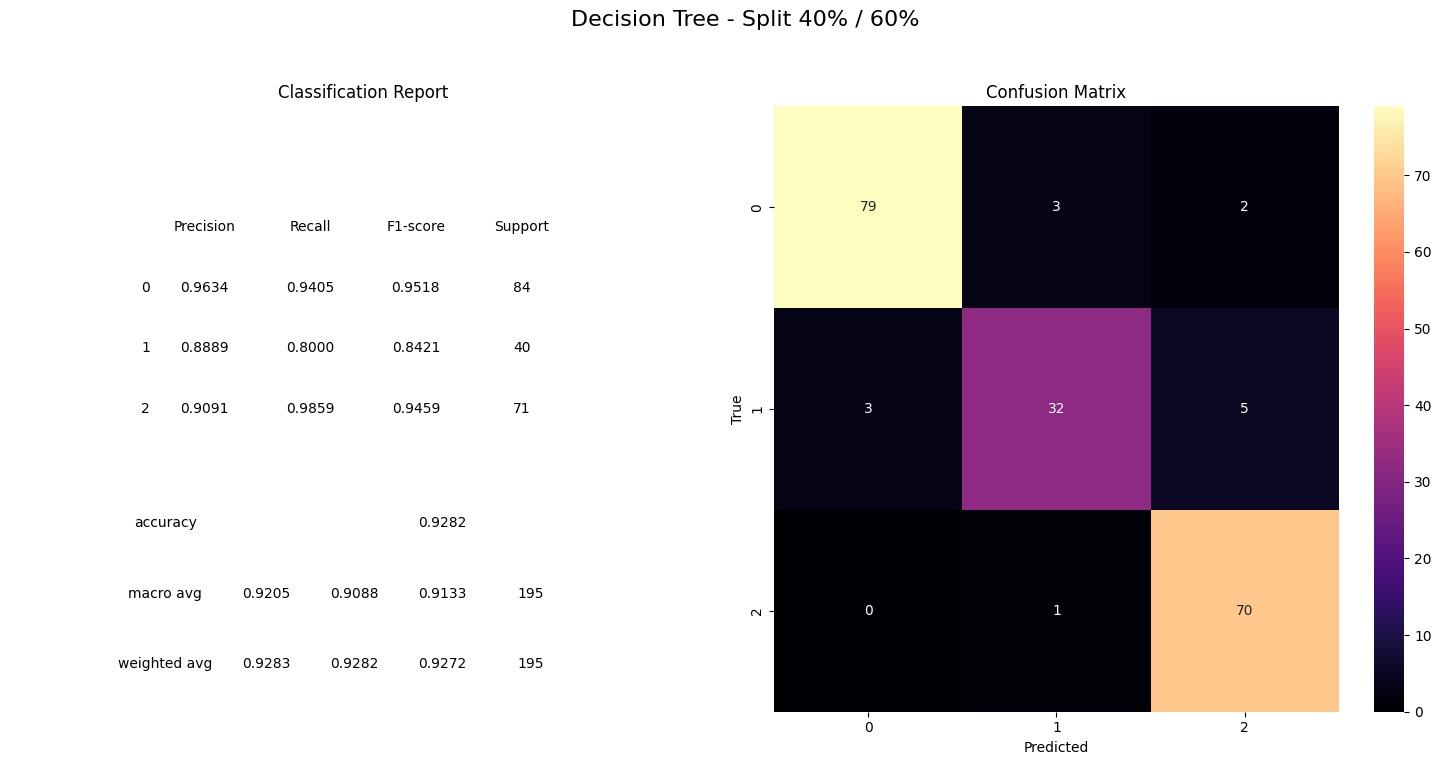

✓ Evaluation saved: output/report/split_ratios_ver\report_model_40_60.png


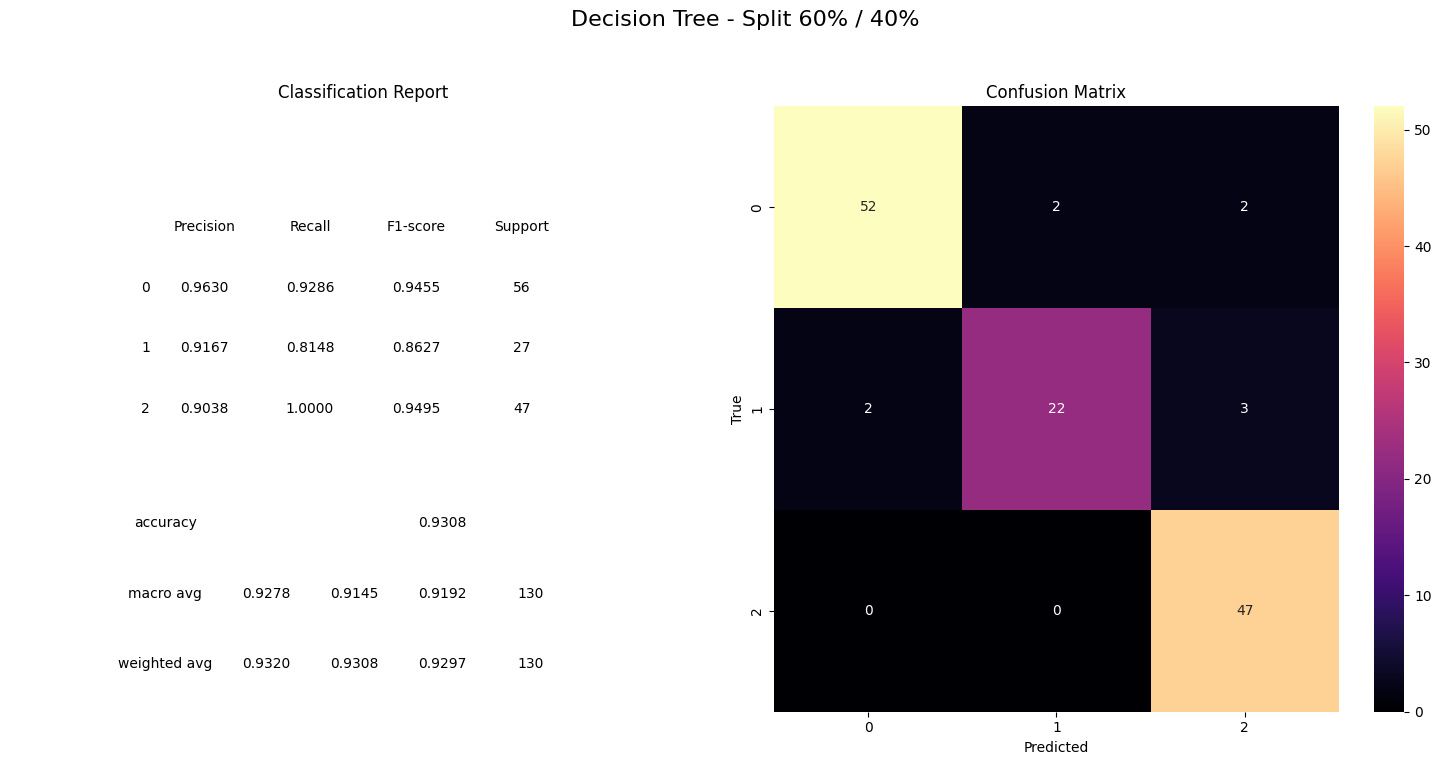

✓ Evaluation saved: output/report/split_ratios_ver\report_model_60_40.png


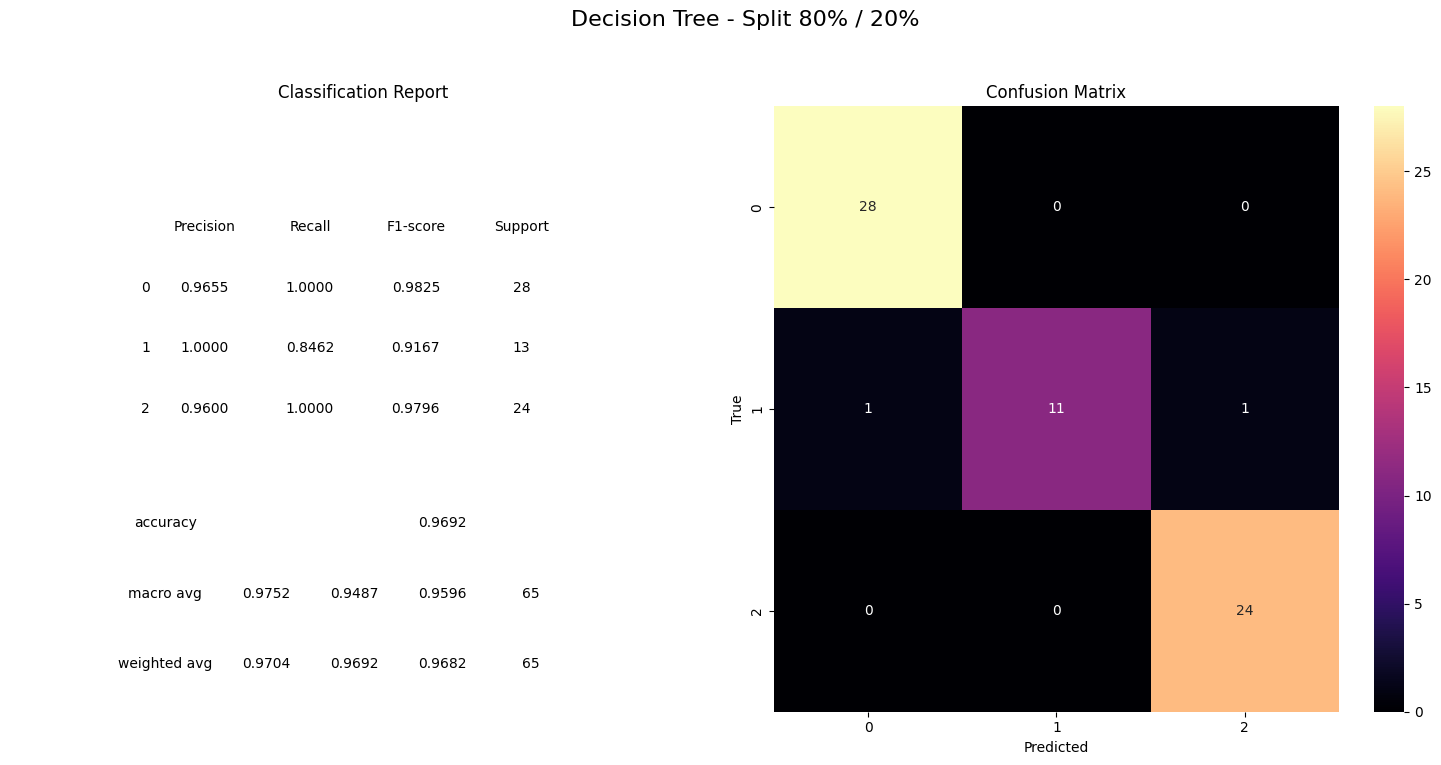

✓ Evaluation saved: output/report/split_ratios_ver\report_model_80_20.png


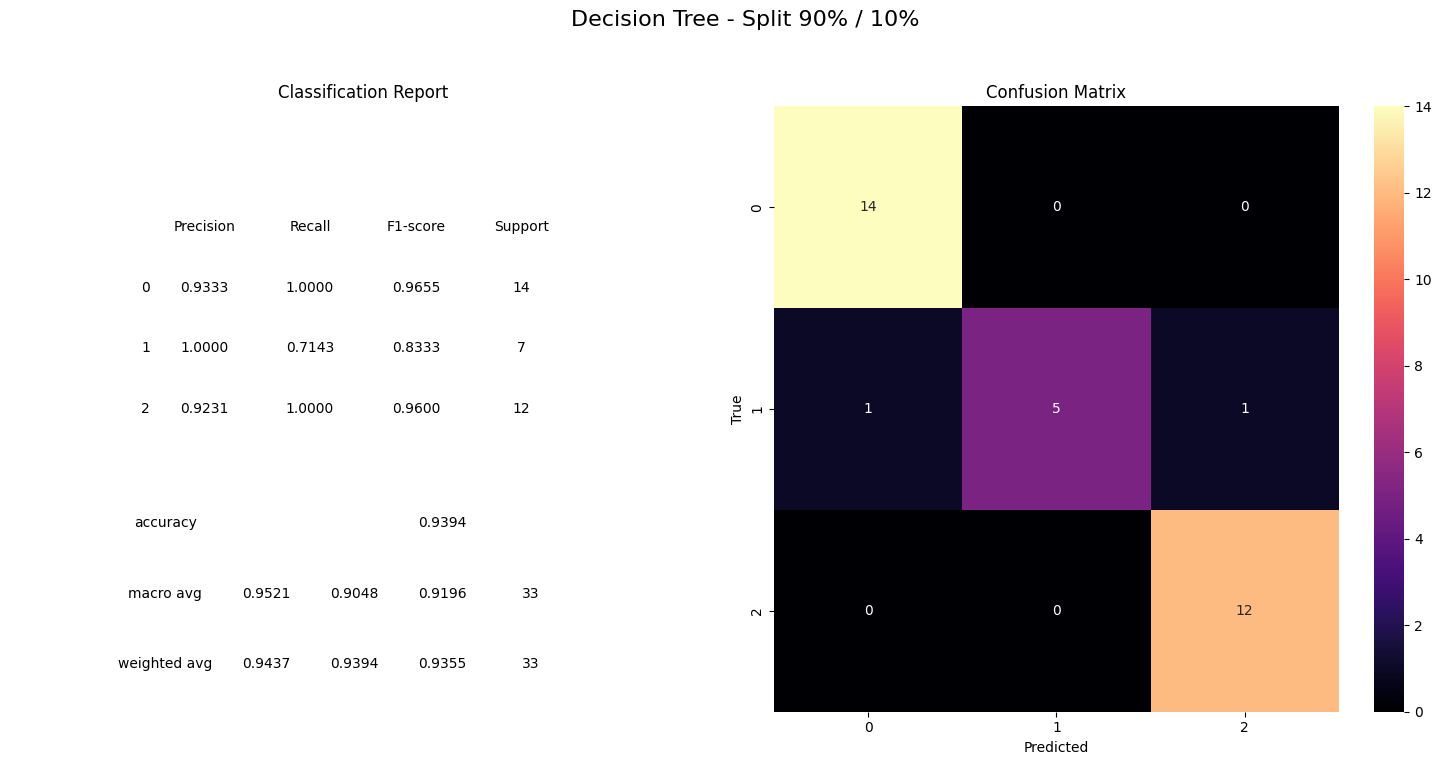

✓ Evaluation saved: output/report/split_ratios_ver\report_model_90_10.png


In [101]:
evaluate_and_visualize_models(list_models, datasets, split_ratios)

# **5. The depth and accuracy of a decision tree**


## **5.1 Training model with max depth of decision tree**


In [102]:
def train_decision_trees_by_depth(datasets, depth_list, save_dir="model/max_depth_ver"):
    """
    Huấn luyện các mô hình Decision Tree với nhiều giá trị độ sâu khác nhau (max_depth)
    và đánh giá độ chính xác trên tập kiểm tra.

    Args:
        datasets (tuple): Bộ dữ liệu train/test (feature_train, feature_test, label_train, label_test).
        depth_list (list): Danh sách các giá trị max_depth cần thử nghiệm.
        save_dir (str): Đường dẫn thư mục lưu mô hình và file kết quả.

    Returns:
        tuple:
            - trained_models (list): Các mô hình huấn luyện.
            - accuracy_by_depth (dict): Ánh xạ từ max_depth sang độ chính xác.
    """
    os.makedirs(save_dir, exist_ok=True)

    # Tách dữ liệu 80/20
    X_train = datasets[2]["X_train"]
    X_test = datasets[2]["X_test"]
    y_train = datasets[2]["y_train"]
    y_test = datasets[2]["y_test"]

    trained_models = []
    accuracy_by_depth = {}

    for depth in depth_list:
        # Huấn luyện mô hình
        clf = DecisionTreeClassifier(
            criterion="entropy",
            max_depth=depth,
            random_state=42
        )
        clf.fit(X_train, y_train)
        trained_models.append(clf)

        # Đánh giá độ chính xác
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_by_depth[depth] = accuracy

        # Lưu mô hình
        model_path = os.path.join(save_dir, f"decision_tree_depth_{depth}.pkl")
        joblib.dump(clf, model_path)
        print(f"✓ Model saved: {model_path}")

    # ===== Lưu kết quả accuracy ra CSV =====
    result_df = pd.DataFrame({
        "max_depth": ["None" if d is None else d for d in accuracy_by_depth.keys()],
        "accuracy": list(accuracy_by_depth.values())
    })
    result_csv_path = os.path.join(save_dir, "accuracy_by_depth.csv")
    result_df.to_csv(result_csv_path, index=False)
    print(f"✓ Accuracy results saved to: {result_csv_path}")

    return trained_models, accuracy_by_depth

In [103]:
list_max_depth = [None, 1, 2, 3, 4, 5, 6, 7]
list_max_depth_model, accuracy_results = train_decision_trees_by_depth(
    datasets, list_max_depth
)

✓ Model saved: model/max_depth_ver\decision_tree_depth_None.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_1.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_2.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_3.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_4.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_5.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_6.pkl
✓ Model saved: model/max_depth_ver\decision_tree_depth_7.pkl
✓ Accuracy results saved to: model/max_depth_ver\accuracy_by_depth.csv


## **5.2 Visualize decision trees with each `max_depth` value.**


In [104]:
def export_and_display_trees_by_depth(models, depth_list, feature_names, class_labels, save_dir="output/max_depth_graphviz"):
    """
    Trực quan hóa và lưu các cây quyết định tương ứng với các giá trị max_depth khác nhau.

    Args:
        models (list): Danh sách các mô hình DecisionTreeClassifier đã huấn luyện.
        depth_list (list): Danh sách các giá trị max_depth được sử dụng.
        feature_names (list): Tên các đặc trưng được sử dụng trong mô hình.
        class_labels (list): Tên các lớp tương ứng với nhãn đầu ra.
        save_dir (str): Thư mục để lưu các biểu đồ cây dưới dạng PNG.
    """
    os.makedirs(save_dir, exist_ok=True)

    for model, depth in zip(models, depth_list):
        # Chuyển cây thành định dạng DOT
        dot = export_graphviz(
            model,
            feature_names=feature_names,
            class_names=class_labels,
            filled=True,
            rounded=True,
            special_characters=True
        )

        # Tạo đối tượng Graphviz
        tree_graph = graphviz.Source(dot)
        tree_graph.engine = "dot"

        # Tên file lưu
        filename = f"graph_model_80_20_depth_{depth}"
        filepath = os.path.join(save_dir, filename)

        # Xuất file PNG
        tree_graph.render(filepath, format="png", cleanup=True)

        # Hiển thị trực tiếp trong notebook (nếu có)
        display(tree_graph)

        # Thông báo hoàn tất
        print(f"✓ Decision tree (depth={depth}) visualized and saved to {filepath}.png")

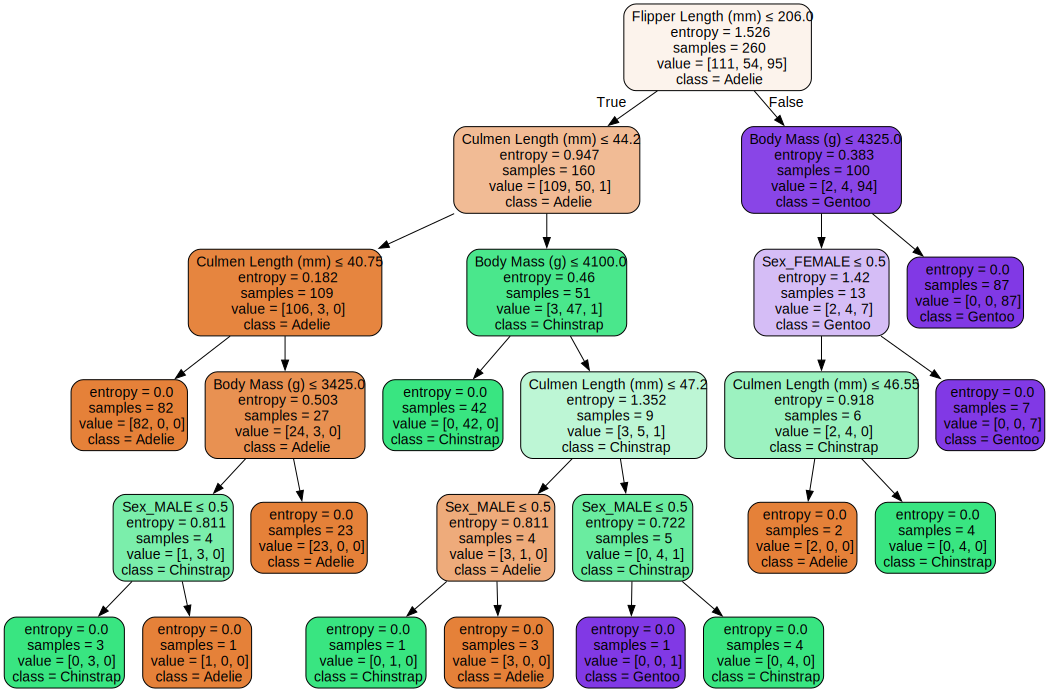

✓ Decision tree (depth=None) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_None.png


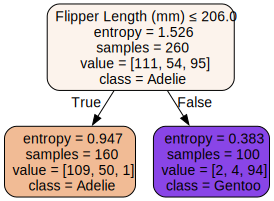

✓ Decision tree (depth=1) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_1.png


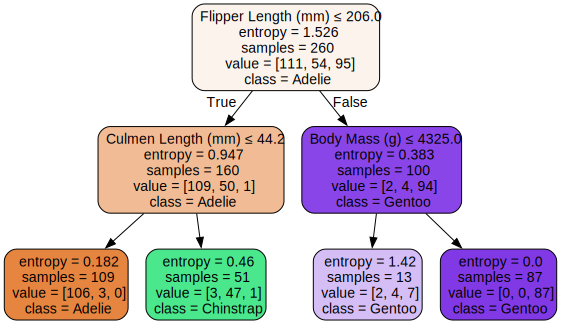

✓ Decision tree (depth=2) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_2.png


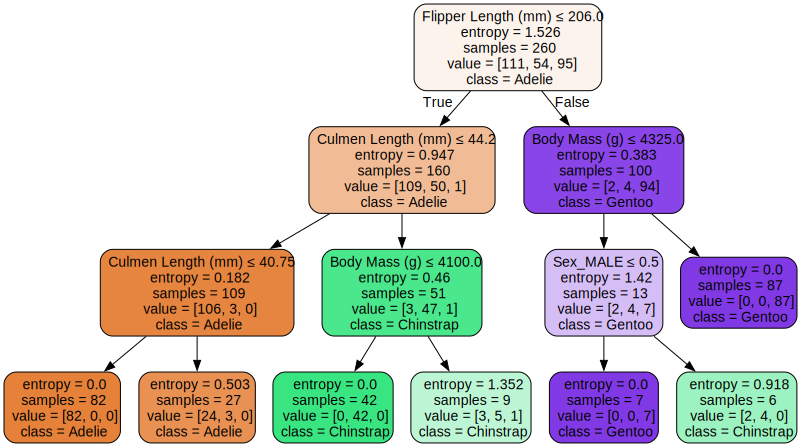

✓ Decision tree (depth=3) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_3.png


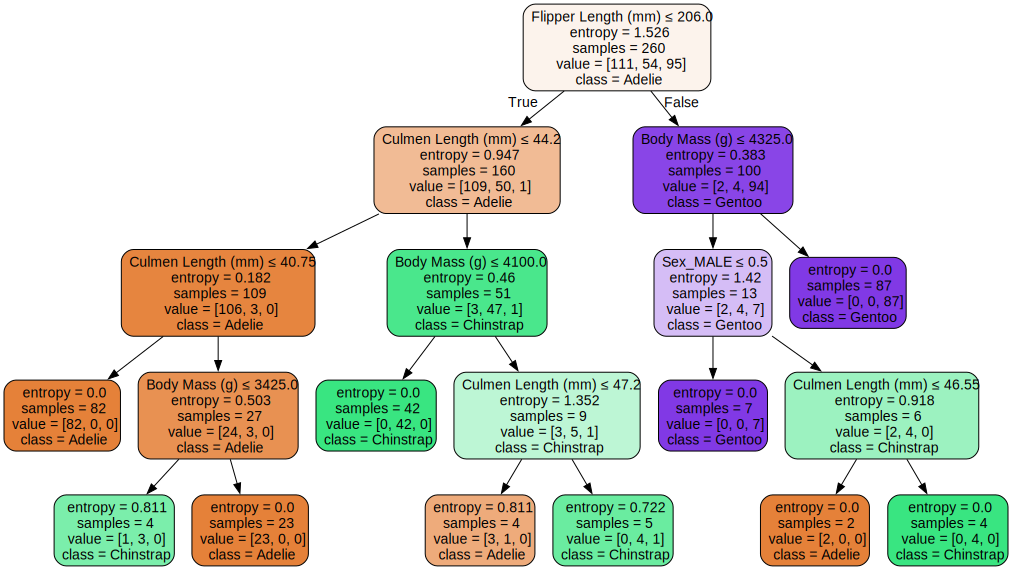

✓ Decision tree (depth=4) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_4.png


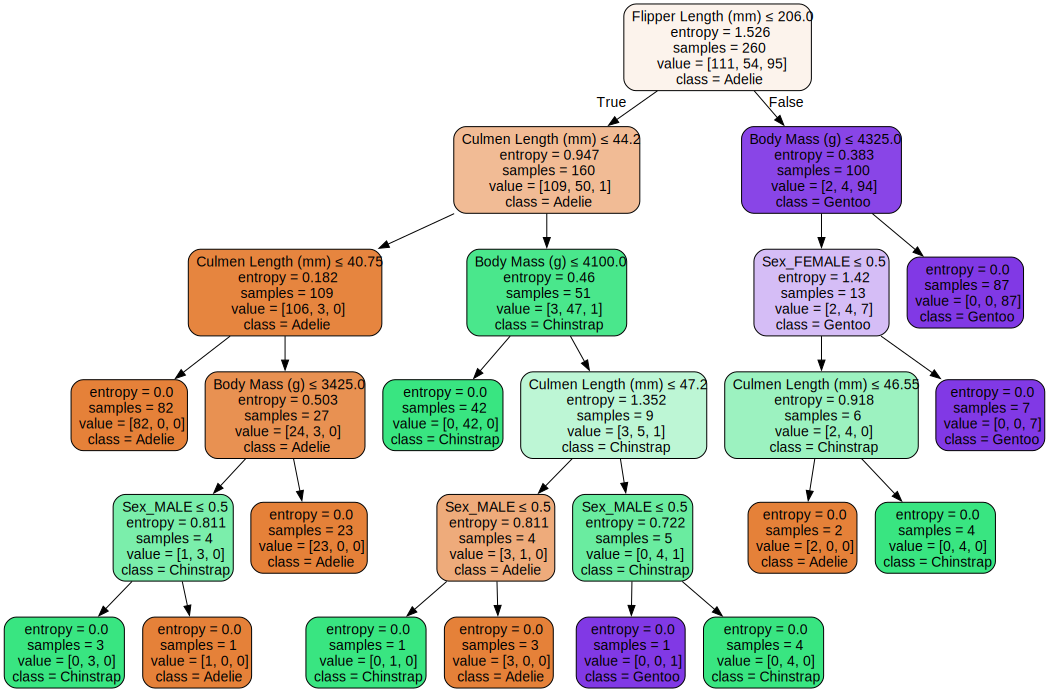

✓ Decision tree (depth=5) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_5.png


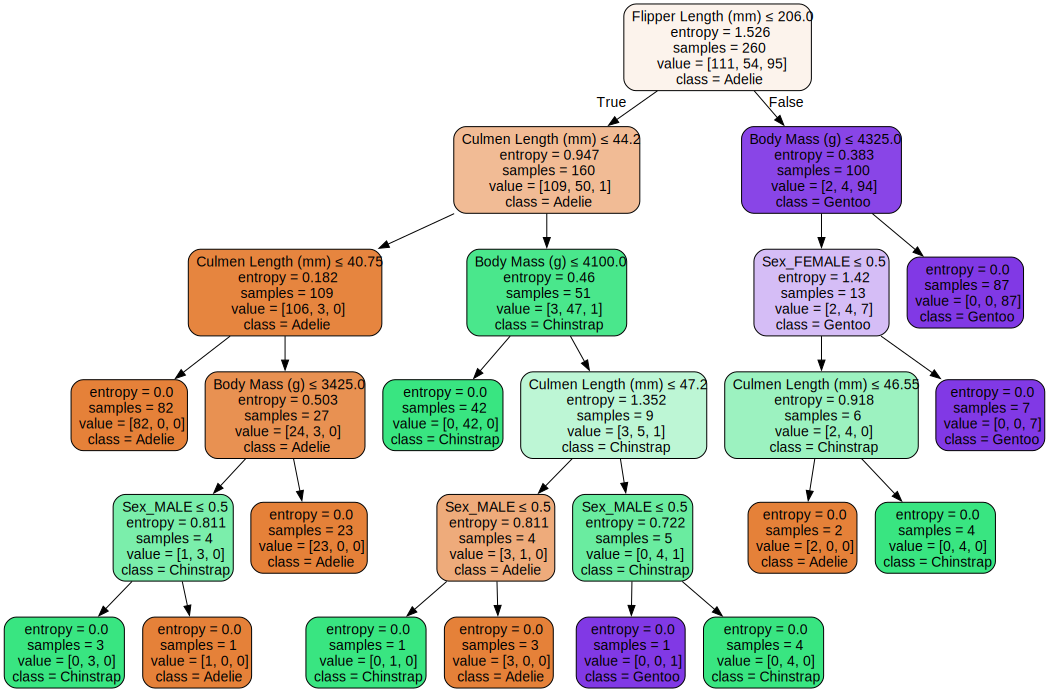

✓ Decision tree (depth=6) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_6.png


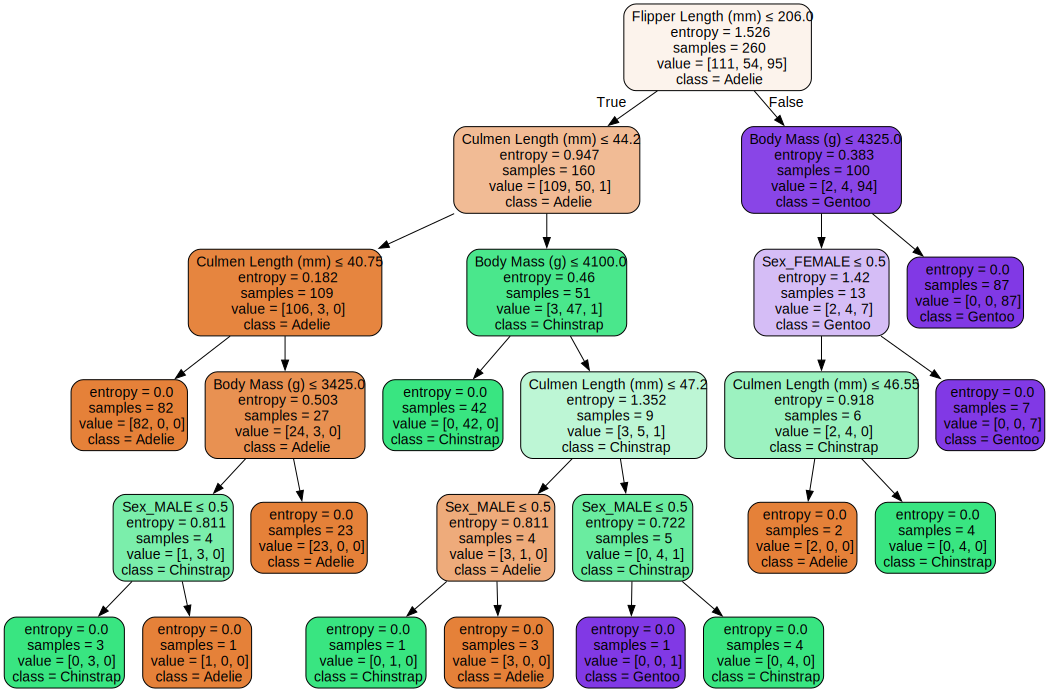

✓ Decision tree (depth=7) visualized and saved to output/max_depth_graphviz\graph_model_80_20_depth_7.png


In [105]:
export_and_display_trees_by_depth(list_max_depth_model, list_max_depth, features_name, class_name)

## **5.3 Report of decision tree when changing the value of parameter `max_depth`**


In [106]:
def visualize_accuracy_by_depth(accuracy_dict, save_path):
    """
    Trực quan hóa độ chính xác tương ứng với từng giá trị max_depth của Decision Tree.
    Hiển thị bảng và biểu đồ đường để so sánh trực quan hiệu suất mô hình.

    Args:
        accuracy_dict (dict): Từ điển ánh xạ max_depth → accuracy.
        save_path (str): Đường dẫn lưu ảnh biểu đồ kết quả.
    """
    # Chuẩn bị dữ liệu
    max_depths = list(accuracy_dict.keys())
    accuracies = list(accuracy_dict.values())

    # Dữ liệu cho bảng
    table_data = [[str(depth) if depth is not None else "No Limit", f"{acc:.4f}"]
                  for depth, acc in zip(max_depths, accuracies)]

    # Vẽ hình
    plt.figure(figsize=(15, 6))

    # Bảng thống kê
    plt.subplot(1, 2, 1)
    table = plt.table(
        cellText=table_data,
        colLabels=["Max Depth", "Accuracy"],
        loc="center",
        cellLoc="center",
        colWidths=[0.2, 0.3]
    )
    table.auto_set_font_size(False)
    table.set_fontsize(10)

    for cell in table.get_celld().values():
        cell.set_height(0.1)

    plt.axis("off")
    plt.title("Bảng độ chính xác")

    # Biểu đồ đường
    plt.subplot(1, 2, 2)
    plot_labels = ["No Limit" if d is None else d for d in max_depths]
    plt.plot(plot_labels, accuracies, marker="o", linestyle="-", color="red")
    plt.xlabel("Max Depth")
    plt.ylabel("Accuracy")
    plt.title("Biểu đồ Accuracy theo Max Depth")

    plt.suptitle("So sánh độ sâu cây và độ chính xác của Decision Tree")
    plt.tight_layout()
    plt.savefig(save_path)
    plt.show()

    print(f"✓ Accuracy chart saved to: {save_path}")

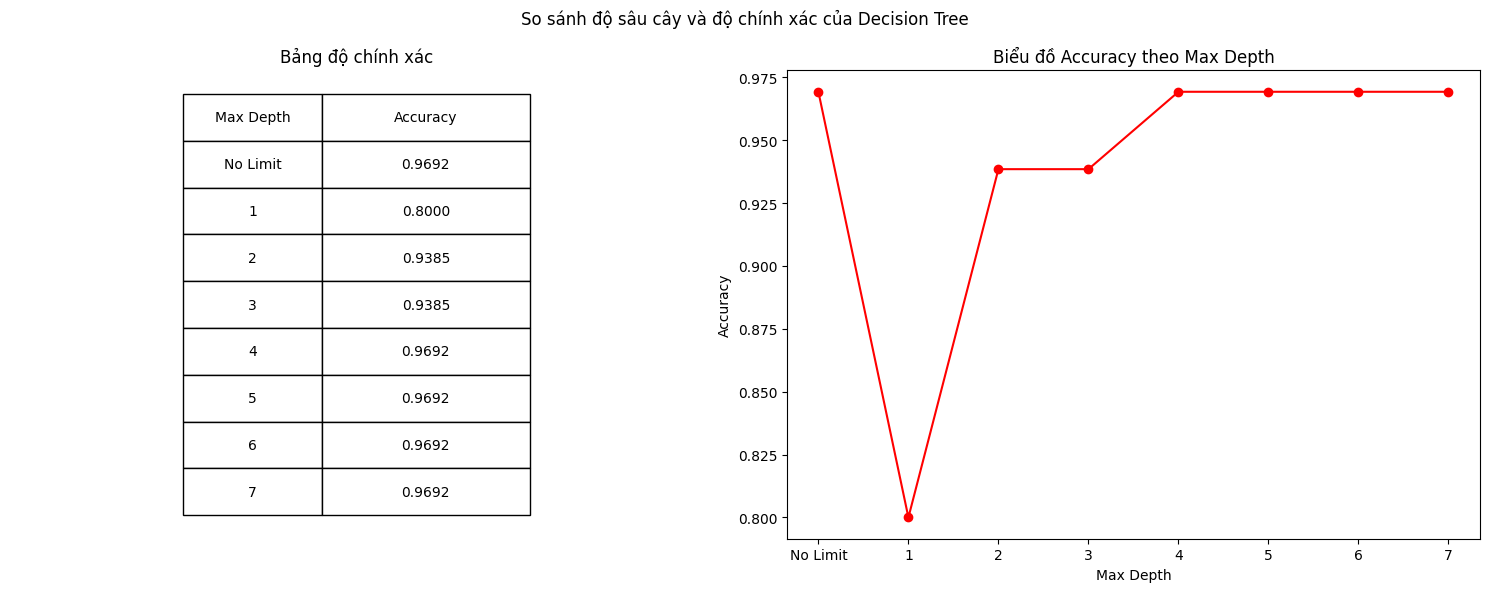

✓ Accuracy chart saved to: output/report/max_depth_ver/accuracy_report.png


In [107]:
output_path = f"output/report/max_depth_ver/accuracy_report.png"
visualize_accuracy_by_depth(accuracy_results, output_path)
